## Importing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("star_wars.csv", encoding = 'ISO-8859-1')
print(star_wars.head(10))
star_wars.columns

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning / Modifying the Data

In [2]:
star_wars_yes = pd.notnull(star_wars['RespondentID'])
star_wars = star_wars[star_wars_yes]

#### Find rows which do not have null values under RespondentID column, and pass the boolean list to the main dataframe to get only rows which do not have null values under RespondentID

In [3]:
yes_no = {
    'Yes':True,
    'No':False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

#### converting the values from 'Yes'/'No', to boolean 'True'/'False', which will help us further in our calculations

In [4]:
col_names = star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [6]:
col_conv = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    'NaN' : False
}

count = 1
for each in col_names:
    star_wars[each] = star_wars[each].map(col_conv)
    new_col = 'seen_' + str(count)
    count += 1
    star_wars = star_wars.rename(columns = {each:new_col})



#### In the above code, I am doing the following,
#### 1 - I am selecting all the columns which need to be renamed to something else
#### 2 - I am setting up a dictionary to map and convert all the values in the columns to boolean values
#### 3 - Once that is setup, I am executing a for loop which will 
#####                a - map the column values under all the columns in col_names to boolean values
####               b - Since I want the new column name to display seen, suffixed with the sequence in which movies were seen
####               c - Finally, I am renaming the columns to represent the new column names

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
rank_col = star_wars.columns[9:15]
for each in rank_col:
    new_col = 'ranking_' + str(count)
    count += 1
    star_wars = star_wars.rename(columns = {each:new_col})

#### I am executing a for loop which will,
#### a - Since I want the new column name to display rank suffixed with the sequence of rank, I hold the new value in new_col variable
#### b - Finally, I am renaming the columns to represent the new column names

In [10]:
rank_col = star_wars[star_wars.columns[9:15]].mean()

## Ranking Bar Plot

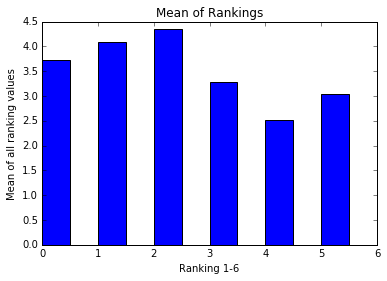

In [11]:
%matplotlib inline
plt.bar(range(6), rank_col, width = 0.5)
plt.xlabel("Ranking 1-6")
plt.ylabel("Mean of all ranking values")
plt.title("Mean of Rankings")

#### From the above bar chart, we see that star_war movies 3 has got the highest ranking, following by 2,1,4,6,5. This allows us to visualize how well each movies ranked amoung all the respondents. 

## Viwership Bar Plot

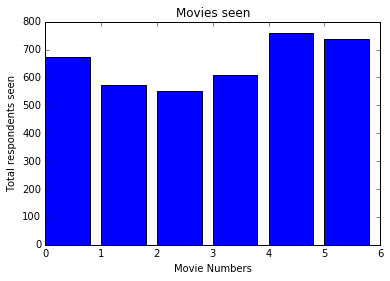

In [12]:
movies_seen = star_wars[star_wars.columns[3:9]].sum()
plt.bar(range(len(movies_seen)), movies_seen)
plt.xlabel("Movie Numbers")
plt.ylabel("Total respondents seen")
plt.title("Movies seen")

#### The above bar chart shows how well each movie has fared with regards to the number of views across all respondents. Star_war movies 5-6 have got the highest viewership.

## Based on Gender

In [13]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

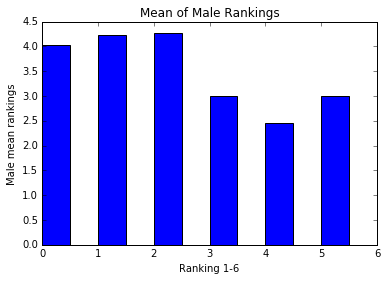

In [15]:
%matplotlib inline
plt.bar(range(6), males[males.columns[9:15]].mean(), width = 0.5)
plt.xlabel("Ranking 1-6")
plt.ylabel("Male mean rankings")
plt.title("Mean of Male Rankings")

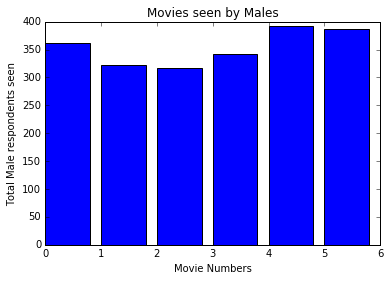

In [16]:
movies_seen = males[males.columns[3:9]].sum()
plt.bar(range(len(movies_seen)), movies_seen)
plt.xlabel("Movie Numbers")
plt.ylabel("Total Male respondents seen")
plt.title("Movies seen by Males")

#### The above two graphs plotted for ranking/viewership across only males show how each of the star_war movies have fared. We see a higher ranking for star_war movies 1-3, but the viewership is lower compared to the movies 4-6, where the viewership is higher but ranking is low. This may seem as if the rankings were biased based on the total viewership across each star_war movie 

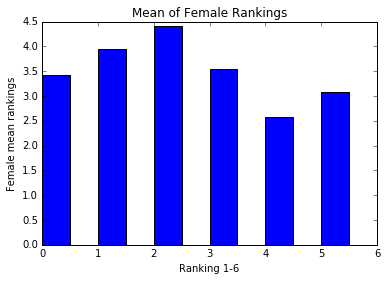

In [17]:
plt.bar(range(6), females[females.columns[9:15]].mean(), width = 0.5)
plt.xlabel("Ranking 1-6")
plt.ylabel("Female mean rankings")
plt.title("Mean of Female Rankings")

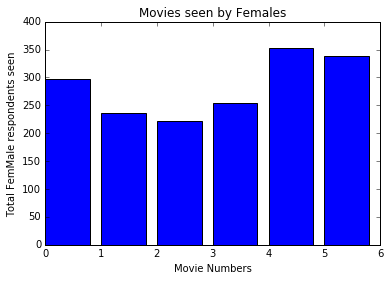

In [18]:
movies_seen = females[females.columns[3:9]].sum()
plt.bar(range(len(movies_seen)), movies_seen)
plt.xlabel("Movie Numbers")
plt.ylabel("Total FemMale respondents seen")
plt.title("Movies seen by Females")

#### The above two graphs plotted for ranking/viewership across only females show how each of the star_war movies have fared. The same trend as for males repeats here, we see a higher ranking for star_war movies 1-3, but the viewership is lower compared to the movies 4-6, where the viewership is higher but ranking is low. This may seem as if the rankings were biased based on the total viewership across each star_war movie